In [3]:

import pandas as pd
import json


# reading the JSON data using json.load()
file = 'C:\\Users\\gajanana_ganjigatti\\Documents\\Gaju_data\\Quest\\eva4\\S12\\tiny-imagenet_update\\via_export_coco.json'

with open(file) as tiny_file:
    tiny_dict = json.load(tiny_file)

In [4]:
dict_train

{'info': {'year': 2020,
  'version': '1',
  'description': 'Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
  'contributor': '',
  'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
  'date_created': 'Sat Apr 18 2020 23:05:53 GMT+0530 (India Standard Time)'},
 'images': [{'id': 0,
   'width': 500,
   'height': 375,
   'file_name': 'dog_01.jpeg',
   'license': 1,
   'date_captured': ''},
  {'id': 1,
   'width': 450,
   'height': 330,
   'file_name': 'dog_02.jpeg',
   'license': 1,
   'date_captured': ''},
  {'id': 2,
   'width': 640,
   'height': 426,
   'file_name': 'dog_05.jpeg',
   'license': 1,
   'date_captured': ''},
  {'id': 3,
   'width': 800,
   'height': 534,
   'file_name': 'dog_06.JPEG',
   'license': 1,
   'date_captured': ''},
  {'id': 4,
   'width': 259,
   'height': 194,
   'file_name': 'dog_07.JPEG',
   'license': 1,
   'date_captured': ''},
  {'id': 5,
   'width': 510,
   'height': 340,
   'file_name': 'dog_09.JPEG',
   'licens

In [5]:

dataset = dict()
dataset['Image'] = list()
dataset['Img-Width'] = list()
dataset['Img-Height'] = list()
dataset['Class'] = list()
dataset['Box-x'] = list()
dataset['Box-y'] = list()
dataset['Box-w'] = list()
dataset['Box-h'] = list()

In [17]:
for i in range(50):
    dataset['Image'].append(tiny_dict['images'][i]['file_name'])
    dataset['Img-Width'].append(tiny_dict['images'][i]['width'])
    dataset['Img-Height'].append(tiny_dict['images'][i]['height'])
    dataset['Class'].append('Dog')
    dataset['Box-x'].append(tiny_dict['annotations'][i]['bbox'][0])
    dataset['Box-y'].append(tiny_dict['annotations'][i]['bbox'][1])
    dataset['Box-w'].append(tiny_dict['annotations'][i]['bbox'][2])
    dataset['Box-h'].append(tiny_dict['annotations'][i]['bbox'][3])

In [18]:
train = pd.DataFrame.from_dict(dataset, orient='index')
train = train.T

In [19]:
train.head()

,Image,Img-Width,Img-Height,Class,Box-x,Box-y,Box-w,Box-h
0,dog_01.jpeg,500,375,Dog,9,7,449,362
1,dog_02.jpeg,450,330,Dog,48,10,338,317
2,dog_05.jpeg,640,426,Dog,50,9,189,384
3,dog_06.JPEG,800,534,Dog,257,13,221,402
4,dog_07.JPEG,259,194,Dog,413,228,254,305


In [20]:
train_final = train.copy()

In [21]:

for i in range(len(train_final)):
    train_final['Box-x'][i] = round(train_final['Box-x'][i]/train_final['Img-Width'][i],2)
    train_final['Box-y'][i] = round(train_final['Box-y'][i]/train_final['Img-Height'][i],2)
    train_final['Box-w'][i] = round(train_final['Box-w'][i]/train_final['Img-Width'][i],2)
    train_final['Box-h'][i] = round(train_final['Box-h'][i]/train_final['Img-Height'][i],2)

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [23]:
df = train_final[['Box-w','Box-h']]

[[0.58666667 0.91266667]
 [0.16       0.25275862]
 [0.83166667 1.89833333]]


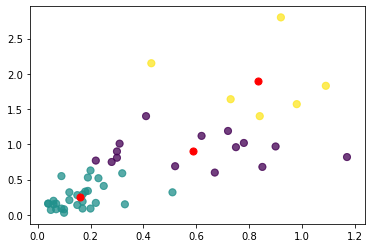

In [24]:
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

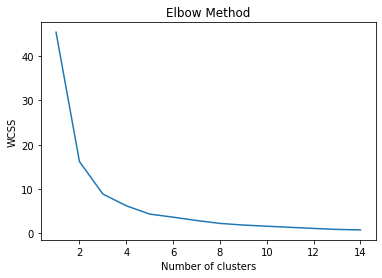

In [25]:

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

[[0.3025     0.69583333]
 [0.81333333 2.26      ]
 [0.15041667 0.18791667]
 [0.79545455 1.16090909]]


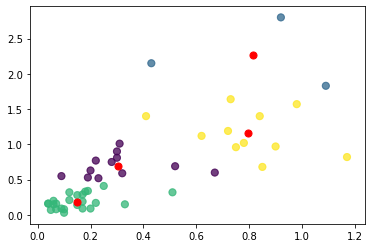

In [26]:

kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

[[0.15041667 0.18791667]
 [0.81       1.568     ]
 [0.8075     0.92      ]
 [0.26909091 0.70454545]
 [0.675      2.475     ]]


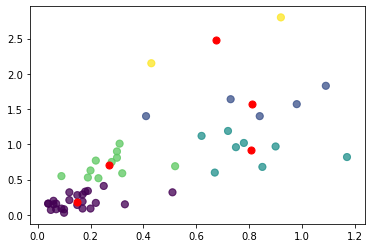

In [27]:
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['Box-w'], df['Box-h'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()